**1. Importing Libraries**

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**2. Loading the Dataset**

In [13]:
# Load the dataset (replace with the actual file path)
file_path = '/content/Housing.csv'  # Update this with your dataset path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


**3. Data Preprocessing**
-Handling missing values.
-Encoding categorical features (yes, no) into numerical values.
-Feature selection.

In [14]:
# Check for missing values
print(data.isnull().sum())

# Encode categorical columns with 'yes'/'no' as binary values (1/0)
label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the updated dataset
print(data.head())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1

**4. Feature Selection**
Selecting the features (independent variables) and target (dependent variable).

In [15]:
# Define features (X) and target (y)
X = data.drop('price', axis=1)  # All columns except 'price'
y = data['price']  # Target variable


**5. Splitting the Data into Training and Testing Sets**

In [16]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 436
Test set size: 109


**6. Training the Model**
Using a Linear Regression model to predict housing prices.

In [17]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

**7. Model Evaluation**
Predicting on the test set.
Evaluating model performance using Mean Squared Error (MSE) and R-squared (R²).

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 1771751116594.0352
R-squared (R²): 0.6494754192267803


**8. Visualizing Results**
Plotting a graph to compare the true and predicted prices.

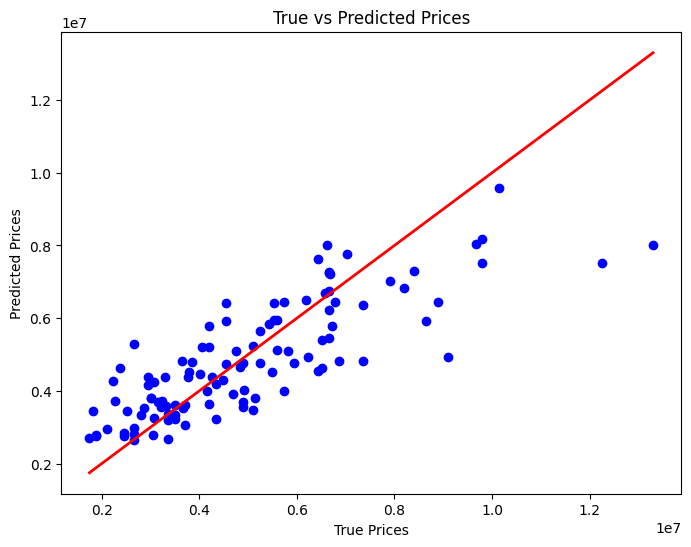

In [19]:
# Plotting true vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()


**9. Predicting New Data (Optional)**
If you want to predict housing prices for new data points:

In [20]:
# Example of new data to predict
new_data = pd.DataFrame({
    'area': [8000, 8500],
    'bedrooms': [3, 4],
    'bathrooms': [2, 3],
    'stories': [2, 3],
    'mainroad': [1, 0],
    'guestroom': [0, 1],
    'basement': [1, 1],
    'hotwaterheating': [0, 1],
    'airconditioning': [1, 1],
    'parking': [2, 3],
    'prefarea': [1, 0],
    'furnishingstatus': [1, 0]
})

# Predict prices for the new data
predicted_prices = model.predict(new_data)

# Display predicted prices
print(predicted_prices)


[7838829.70278092 9899124.86726644]


**Summary of the Project**


*   Data loading: We loaded the dataset into a Pandas DataFrame.

*   Data preprocessing: We handled categorical variables and encoded them into numerical values.

*   Model training: We used Linear Regression to predict housing prices based on various features.

*   Model evaluation: We evaluated the model using Mean Squared Error (MSE) and R-squared (R²).
*   Visualization: We compared the true vs predicted housing prices with a scatter plot.


**Additional Notes:**


*   You may improve the model by using other regression models such as Decision Trees or Random Forests if needed.

*   Hyperparameter tuning could be done using GridSearchCV for better model performance.
*   You can also try using Feature Scaling (e.g., StandardScaler) to improve performance if using more complex models.






